In [2]:
import pandas as pd

In [3]:
df_Comercio = pd.read_csv('../data/dados_tratados/Comercio.csv', sep=';')
df_Comercio.head()

,Tipo,Produto,Ano,Quantidade
0,VINHO DE MESA,VINHO DE MESA,1970,98327606
1,vm_Tinto,Tinto,1970,83300735
2,vm_Rosado,Rosado,1970,107681
3,vm_Branco,Branco,1970,14919190
4,VINHO FINO DE MESA,VINHO FINO DE MESA,1970,4430629


In [4]:
df_Completo = pd.read_csv('../data/dados_tratados/Completo.csv', sep=';')
df_Completo.head()

,Tipo,Produto,País,Ano,Quantidade (Kg),Valor (US$)
0,Exportação,Espumantes,Alemanha,1970,0,0.0
1,Exportação,Espumantes,Angola,1970,0,0.0
2,Exportação,Espumantes,Antigua e Barbuda,1970,0,0.0
3,Exportação,Espumantes,Antilhas Holandesas,1970,0,0.0
4,Exportação,Espumantes,Argentina,1970,0,0.0


In [5]:
df_Processamento = pd.read_csv('../data/dados_tratados/Processamento.csv', sep=';')
df_Processamento.head()

,index,control,cultivar,Tipo,Produto,Ano,Quantidade (Kg)
0,0,TINTAS,TINTAS,Processamento,Uva Americana,1970,284285642
1,1,ti_Bacarina,Bacarina,Processamento,Uva Americana,1970,82899
2,2,ti_Bailey,Bailey,Processamento,Uva Americana,1970,0
3,3,ti_Bordo,Bordo,Processamento,Uva Americana,1970,7242197
4,4,ti_Bourdin (S),Bourdin (S),Processamento,Uva Americana,1970,0


In [6]:
df_Producao = pd.read_csv('../data/dados_tratados/Producao.csv', sep=';')
df_Producao.head()

,Tipo,Produto,Ano,Quantidade
0,VINHO DE MESA,VINHO DE MESA,1970,217208604
1,vm_Tinto,Tinto,1970,174224052
2,vm_Branco,Branco,1970,748400
3,vm_Rosado,Rosado,1970,42236152
4,VINHO FINO DE MESA (VINÍFERA),VINHO FINO DE MESA (VINÍFERA),1970,23899346


# Gráficos do DataFrame Completo de Importação e Exportação

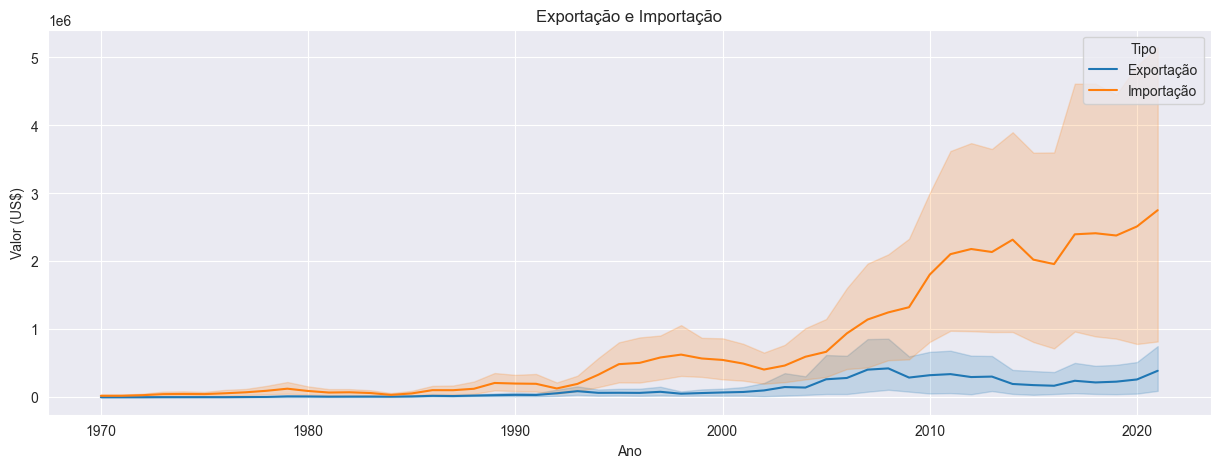

In [8]:
#  graph time series df_Completo compare Tipo Exportação e Importação
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
plt.figure(figsize=(15, 5))
plt.title('Exportação e Importação')
sns.lineplot(x='Ano', y='Valor (US$)', hue='Tipo', data=df_Completo)
plt.show()

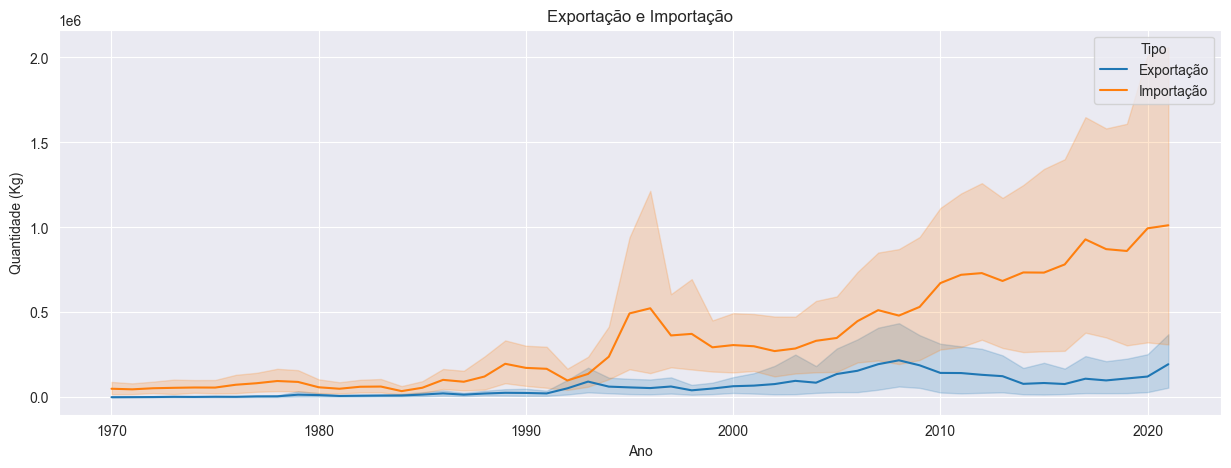

In [9]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 5))
plt.title('Exportação e Importação')
sns.lineplot(x='Ano', y='Quantidade (Kg)', hue='Tipo', data=df_Completo)
plt.show()

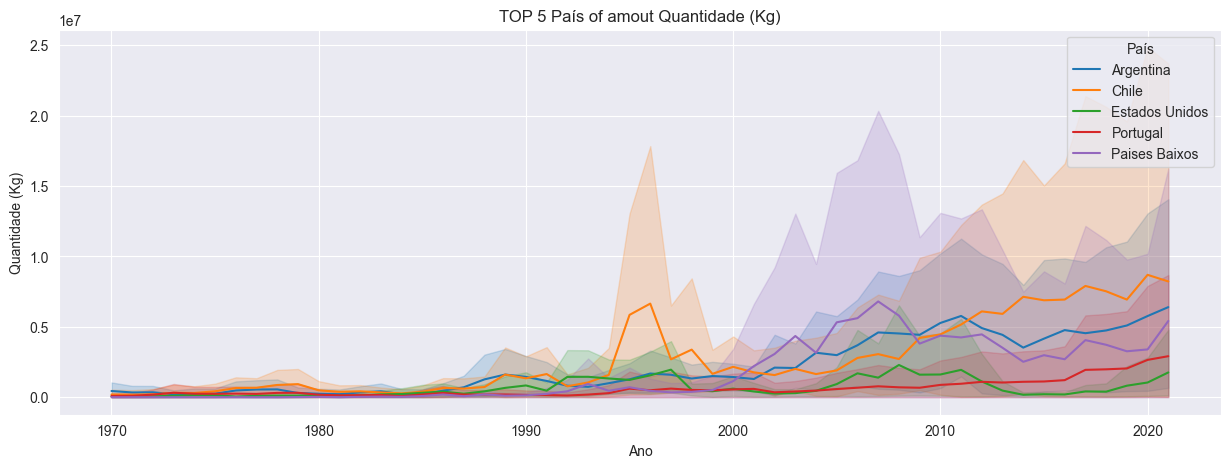

In [10]:
#  graph time series df_Completo compare the TOP 5 País of amout Quantidade (Kg)
TOP_5_Pais = df_Completo.groupby('País')['Quantidade (Kg)'].sum().sort_values(ascending=False).head(5).index
sns.set_style('darkgrid')
plt.figure(figsize=(15, 5))
plt.title('TOP 5 País of amout Quantidade (Kg)')
sns.lineplot(x='Ano', y='Quantidade (Kg)', hue='País', data=df_Completo[df_Completo['País'].isin(TOP_5_Pais)])
plt.show()


In [21]:
df_Completo.describe()

,Ano,Quantidade (Kg),Valor (US$)
count,33644.000000,3.364400e+04,3.364300e+04
mean,1995.500000,1.469682e+05,3.089160e+05
std,15.008554,1.512512e+06,3.570662e+06
min,1970.000000,0.000000e+00,0.000000e+00
25%,1982.750000,0.000000e+00,0.000000e+00
50%,1995.500000,0.000000e+00,0.000000e+00
75%,2008.250000,0.000000e+00,0.000000e+00
max,2021.000000,7.272619e+07,1.825681e+08


In [23]:
df_Completo['Produto'].unique()

array(['Espumantes', 'Suco', 'Uva', 'Vinho', 'Uva Fresca', 'Uva Passa'],
      dtype=object)

In [31]:
#last 15 years
anos = df_Completo['Ano'].unique()
anos = anos[-15:]
anos

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021], dtype=int64)

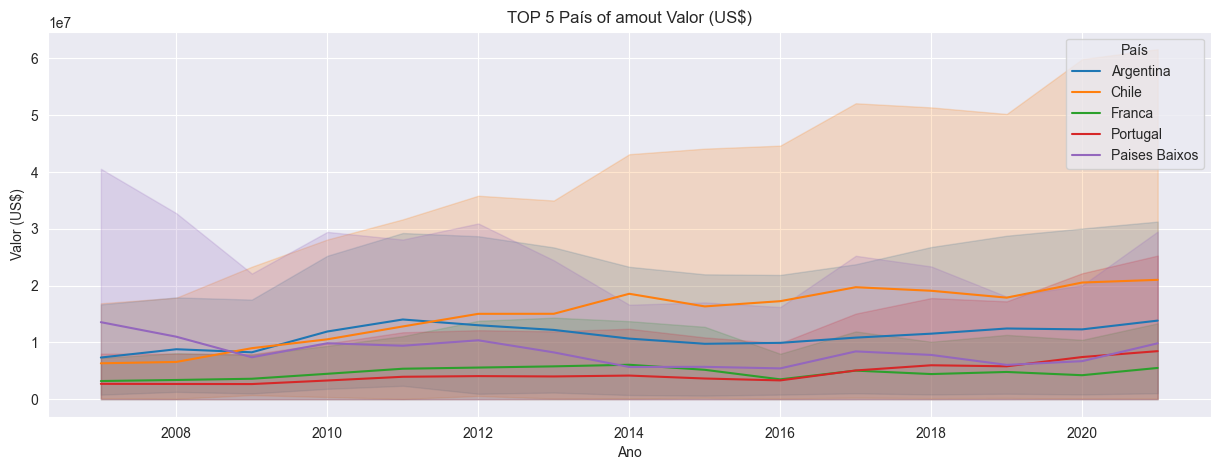

In [32]:
#  graph time series df_Completo compare the TOP 5 País of amout Valor (US$) filter Ano that have Valor bigger than the mean
Years_With_Valor_Bigger_Than_Mean = anos
TOP_5_Pais = df_Completo.groupby('País')['Valor (US$)'].sum().sort_values(ascending=False).head(5).index
sns.set_style('darkgrid')
plt.figure(figsize=(15, 5))
plt.title('TOP 5 País of amout Valor (US$)')
sns.lineplot(x='Ano', y='Valor (US$)', hue='País', data=df_Completo[df_Completo['País'].isin(TOP_5_Pais) 
                                                                    & df_Completo['Ano'].isin(Years_With_Valor_Bigger_Than_Mean)])
plt.show()

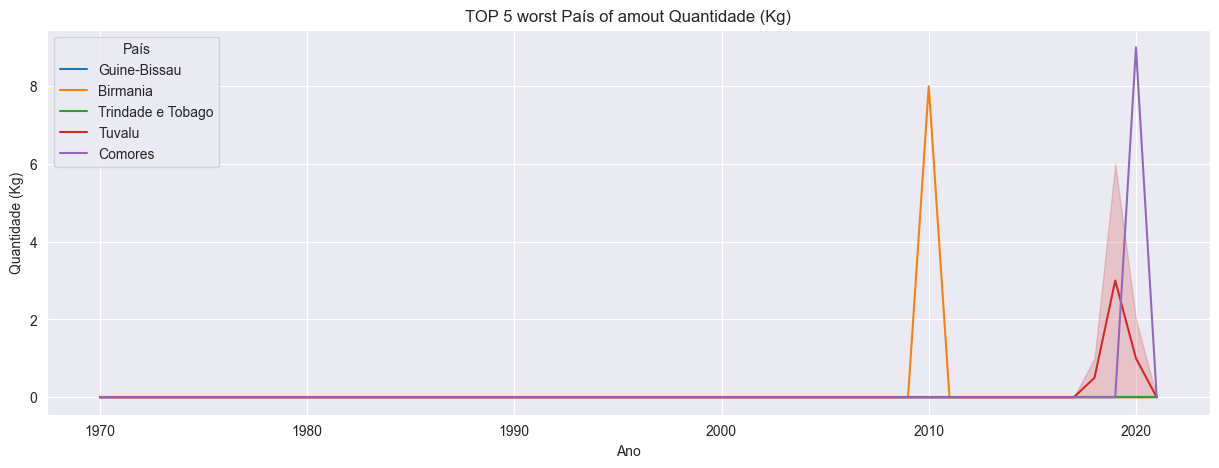

In [12]:
#  graph time series df_Completo compare the TOP 5 País of amout Quantidade (Kg)
TOP_5_Pais = df_Completo.groupby('País')['Quantidade (Kg)'].sum().sort_values(ascending=False).head(5).index
sns.set_style('darkgrid')
plt.figure(figsize=(15, 5))
plt.title('TOP 5 País of amout Quantidade (Kg)')
sns.lineplot(x='Ano', y='Quantidade (Kg)', hue='País', data=df_Completo[df_Completo['País'].isin(TOP_5_Pais)])
plt.show()